In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
tuned_parameters = [
                    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
                    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
                    ]

In [3]:
def prediction(x):
    train_data = np.loadtxt("furukawa.csv",delimiter=",",dtype=float)
    train_feature=train_data[:,0:x]
    train_label=train_data[:,-1]
    
    test_data = np.loadtxt("wang.csv", delimiter=',', dtype=float)
    test_feature = test_data[:, 0:x]
    test_label = test_data[:, -1] 

    scaler = StandardScaler()
    scaler.fit(train_feature)
    train_feature = scaler.transform(train_feature)
    test_feature = scaler.transform(test_feature)

    grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
    grid.fit(train_feature,train_label)
    
    clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
    clf.fit(train_feature, train_label)
    pred = clf.predict(test_feature)

    R2 = r2_score(test_label,pred)
    return R2

In [5]:
data = np.loadtxt("furukawa.csv",delimiter=",",dtype=float)
len(data[0])

160

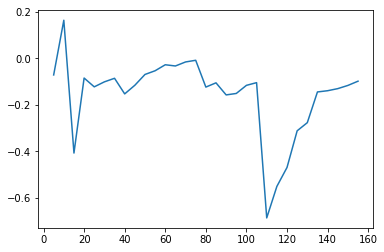

In [6]:
left = np.zeros(31)
height = np.zeros(31)
for i in range(31):
    left[i] = 5*(i+1)
    height[i] = prediction(5*(i+1))
plt.plot(left,height)

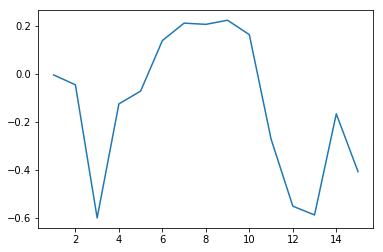

In [14]:
left = np.zeros(15)
height = np.zeros(15)
for i in range(15):
    left[i] = i+1
    height[i] = prediction(i+1)
plt.plot(left,height)

In [16]:
left

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.])

In [17]:
height

array([-0.00436937, -0.04559376, -0.59964179, -0.12500499, -0.07164937,
        0.13858894,  0.21123391,  0.20615883,  0.2232639 ,  0.16322817,
       -0.27138371, -0.55075781, -0.58732314, -0.1663736 , -0.40703055])

In [ ]:
prediction(159)

In [9]:
NumberofFeatures = np.array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
       115., 120., 125., 130., 135., 140., 145., 150., 155.])

In [13]:
r2 = np.array([-0.07164937,  0.16322817, -0.40703055, -0.08489702, -0.12273891,
       -0.10127881, -0.08600717, -0.15302995, -0.11596781, -0.0695881 ,
       -0.05363594, -0.02789771, -0.03316923, -0.01586354, -0.00869883,
       -0.12376416, -0.10553134, -0.15739528, -0.15112751, -0.11630588,
       -0.10472976, -0.68552763, -0.55025879, -0.46889252, -0.31147915,
       -0.27650684, -0.1446585 , -0.13938975, -0.13043116, -0.11668033,
       -0.09842133])

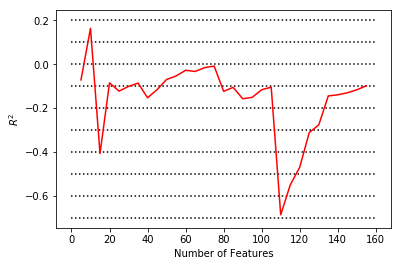

In [20]:
plt.xlabel('Number of Features')
plt.ylabel('$R^{2}$')
plt.plot(NumberofFeatures,r2,c='red')

plt.hlines([0.2], 0,160, linestyles='dotted')     
plt.hlines([0.1], 0,160, linestyles='dotted')  
plt.hlines([0.], 0,160, linestyles='dotted')     
plt.hlines([-0.1], 0,160, linestyles='dotted')   
plt.hlines([-0.2], 0,160, linestyles='dotted')     
plt.hlines([-0.3], 0,160, linestyles='dotted')  
plt.hlines([-0.4], 0,160, linestyles='dotted')   
plt.hlines([-0.5], 0,160, linestyles='dotted')     
plt.hlines([-0.6], 0,160, linestyles='dotted')
plt.hlines([-0.7], 0,160, linestyles='dotted')   
plt.show()